# NLP processing of twitter tweets to detect disaster situations using scikit-learn 

Goal of this notebook is to use scikit-learn library as extensively trying many models and combinations of thereof to detect crisis situations in tweets. <br>

Reusing code found online and then adapt and optimise it for the kaggle twitter dataset <br>
For **logistic regression** and **SVM** start-up code is https://towardsdatascience.com/sentiment-analysis-with-python-part-2-4f71e7bde59a <br>
For hyperparameter tuning : https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5 <br>
Add other estimators : https://scikit-learn.org/stable/supervised_learning.html <br>

Description and documentation per model links:
1. LOGISTIQUE REGRESSION : <br>
https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression <br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression <br>
<br>

2. SUPPORT VECTOR MACHINE : <br>
https://scikit-learn.org/stable/modules/svm.html#classification <br>
https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC <br>
<br>

3. STOCHASTIC GRADIENT DESCENT : <br>
https://scikit-learn.org/stable/modules/linear_model.html#stochastic-gradient-descent-sgd <br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier
 <br>
<br>

4. PERCEPTRON : <br>
https://scikit-learn.org/stable/modules/linear_model.html#perceptron<br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron <br>
<br>

5. MULTI LAYER PERCEPTRON<br>
https://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification <br>
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier <br>
<br>

6. PASSIVE AGGRESSIVE CLASSIFIER <br>
https://scikit-learn.org/stable/modules/linear_model.html#passive-aggressive-algorithms <br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PassiveAggressiveClassifier.html#sklearn.linear_model.PassiveAggressiveClassifier <br>
<br>

7. RANDOM FOREST :<br>
https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees <br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier <br>
<br>

8. DECISION TREE :<br>
https://scikit-learn.org/stable/modules/tree.html#classification <br>
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier <br>
<br>

9. ADABOOST :<br>
https://scikit-learn.org/stable/modules/ensemble.html#adaboost <br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier <br>
<br>

10. GRADIENT BOOST CLASSIFIER: <br>
https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting <br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier <br>
<br>

11. NAIVE BAYES : <br>
https://scikit-learn.org/stable/modules/naive_bayes.html <br> <br>
https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes <br>
https://scikit-learn.org/stable/modules/naive_bayes.html#complement-naive-bayes <br>
https://scikit-learn.org/stable/modules/naive_bayes.html#bernoulli-naive-bayes <br><br>
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB <br>
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html#sklearn.naive_bayes.ComplementNB <br>
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB<br>
<br>
<br>

In [1]:
import numpy as np
import pandas as pd
import os
import re
import string
import io
import requests

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, make_scorer
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# import stopwords. Only need to do it once
#import nltk
#nltk.download("stopwords")

In [3]:
# import wordnet. Only need to do it once
#import nltk
#nltk.download('wordnet')

In [4]:
PUNCT_TO_REMOVE = string.punctuation
STOPWORDS       = set(stopwords.words('english'))
stemmer         = PorterStemmer()

# LOAD DATA SETS

In [5]:
#data set can be either loaded from the web (local_data_set = 0) or locally (local_data_set = 1)
local_data_set = 1

In [6]:
# import training data (tweets)
if local_data_set == 1:
    df_train                     = pd.read_csv(r'.\input\train.csv')
    df_test                      = pd.read_csv(r'.\input\test.csv')
    perfect_pred_df              = pd.read_csv(r'.\input\perfect_submission.csv')
else:
    data_train_url               = r'https://raw.githubusercontent.com/samuelkerhuel/projects/master/kaggle%20NLP%20twitter/input/train.csv'
    data_train_url_s             = requests.get(data_train_url).content
    df_train                     = pd.read_csv(io.StringIO(data_train_url_s.decode('utf-8')))

    data_test_url                = r'https://raw.githubusercontent.com/samuelkerhuel/projects/master/kaggle%20NLP%20twitter/input/test.csv'
    data_test_url_s              = requests.get(data_test_url).content
    df_test                      = pd.read_csv(io.StringIO(data_test_url_s.decode('utf-8')))

    data_perfect_submission_url  = r'https://raw.githubusercontent.com/samuelkerhuel/projects/master/kaggle%20NLP%20twitter/input/perfect_submission.csv'
    data_perf_url_s              = requests.get(data_perfect_submission_url).content
    perfect_pred_df              = pd.read_csv(io.StringIO(data_perf_url_s.decode('utf-8')))


# import test set target
perfect_pred    = perfect_pred_df.target

# START TIMER

use timer to measure processing time

In [7]:
import time

def TicTocGenerator():
    # Generator that returns time differences
    ti = 0           # initial time
    tf = time.time() # final time
    while True:
        ti = tf
        tf = time.time()
        yield tf-ti # returns the time difference

TicToc = TicTocGenerator() # create an instance of the TicTocGen generator

# This will be the main function through which we define both tic() and toc()
def toc(tempBool=True):
    # Prints the time difference yielded by generator instance TicToc
    tempTimeInterval = next(TicToc)
    if tempBool:
        print( "Elapsed time: %f seconds.\n" %tempTimeInterval )

def tic():
    # Records a time in TicToc, marks the beginning of a time interval
    toc(False)

In [8]:
# start timer
tic()

# CLEAN DATA SETS

cleansing of train and data set

In [9]:
def text_cleaning(text):
    '''
    input: string to be cleaned
    output: cleaned string
    '''
    text = text.lower() # make everything lower case
    text = re.compile(r'https?://\S+|www\.\S+').sub(r'', text) #remove url
    text = re.compile(r'@\S+').sub(r'', text) #remove url
    text = re.compile(r'#').sub(r'', text) #remove #
#    text = text.translate(str.maketrans('', '', PUNCT_TO_REMOVE)) #remove punctuation
#    text = " ".join([word for word in str(text).split() if word not in STOPWORDS]) #remove stop words
#    text = " ".join([stemmer.stem(word) for word in text.split()])
    
    return text

In [10]:
# do the cleaning on text
df_train['text_processed'] = df_train['text'].apply(text_cleaning)
df_test['text_processed']  = df_test['text'].apply(text_cleaning)

In [11]:
df_test.text_processed.head(2)

0                   just happened a terrible car crash
1    heard about earthquake is different cities, st...
Name: text_processed, dtype: object

Make train and test set inputs (X) and targets (y) into lists

In [12]:
tweets_train_clean = df_train['text_processed'].tolist()
tweets_test_clean  = df_test['text_processed'].tolist() 

target_train       = df_train['target'].tolist()
target_test        = perfect_pred_df['target'].tolist()


# PRE-PROCESSING DATA FUNCTIONS

## Stop words removal

Stop words are the very common words like ‘if’, ‘but’, ‘we’, ‘he’, ‘she’, and ‘they’. <br>
We can usually remove these words without changing the semantics of a text and doing so often (but not always) improves the performance of a model. <br>
Removing these stop words becomes a lot more useful when we start using longer word sequences as model features (see n-grams below)

In [13]:
from nltk.corpus import stopwords

english_stop_words = stopwords.words('english')
def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ' '.join([word for word in review.split() 
                      if word not in english_stop_words])
        )
    return removed_stop_words


## Stemming

Stemming is considered to be the more crude/brute-force approach to normalization (although this doesn’t necessarily mean that it will perform worse). There’s several algorithms, but in general they all use basic rules to chop off the ends of words.

NLTK has several stemming algorithm implementations. We’ll use the Porter stemmer here but you can explore all of the options with examples here: NLTK Stemmers

In [14]:
def get_stemmed_text(corpus):
    from nltk.stem.porter import PorterStemmer
    stemmer = PorterStemmer()

    return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]

## Lemmatization

Lemmatization works by identifying the part-of-speech of a given word and then applying more complex rules to transform the word into its true root.

In [15]:
def get_lemmatized_text(corpus):
    
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]


# n-grams

Basic processing uses only single word features in the model, which is called 1-grams or unigrams. <br> 
We can potentially add more predictive power to the model by adding two or three (or more) word sequences (bigrams or trigrams) as well.<br> 
For instance the tweet "just happened a terrible car crash" is transformed into following sets:<br>
1-grams: {'just'                     , 'happened'                , 'a'              , 'terrible'     , 'car'      , 'crash'} <br>
2-grams: {'just happened'            , 'happened a'              , 'a terrible'     , 'terrible car' , 'car crash'}<br> 
3-grams: {'just happened a'          , 'happened a terrible'     , 'a terrible car' , 'terrible car crash'}<br> 
4-grams: {'just happened a terrible' , 'happened a terrible car' , 'a terrible car crash'}<br> 


For example, if a movie review had the three word sequence “didn’t love movie” we would only consider these words individually with a unigram-only model and probably not capture that this is actually a negative sentiment because the word ‘love’ by itself is going to be highly correlated with a positive review.

The scikit-learn library makes this really easy to play around with. Just use the ngram argument in the function vectorize below

# Vectorization

Tweets are text and for this data to make sense to our machine learning algorithm we’ll need to convert each tweet to a numeric representation, which we call vectorization.

## Binary Vectorization
The simplest form of vectorization is to create one very large matrix with one column for every unique word in your corpus (where the corpus is all tweets in our case). <br> 
Then we transform each tweet into one row containing 0s and 1s, where 1 means that the word in the corpus corresponding to that column appears in that tweet. <br> 
That being said, each row of the matrix will be very sparse (mostly zeros). <br> 
This process is also known as one hot encoding. <br> 
To use binary encoding, set binary parameter in the vectorize function to True

## Word Counts

Instead of simply noting whether a word appears in the tweet or not, we can include the number of times a given word appears. This can give our sentiment classifier a lot more predictive power. <br> 
For example, if a movie reviewer says ‘amazing’ or ‘terrible’ multiple times in a review it is considerably more probable that the review is positive or negative, respectively. <br> 
To use word count encoding, set binary parameter in the vectorize function to False

In [16]:
def vectorize(text_train,text_test, binary_or_count=True, ngram=(1,1)):
    vectorizer = CountVectorizer(binary=binary_or_count, ngram_range=ngram)
    vectorizer.fit(text_train)
    X = vectorizer.transform(text_train)
    X_test = vectorizer.transform(text_test)
    
    return(X,X_test)


## TF-IDF

Another common way to represent each document in a corpus is to use the tf-idf statistic (term frequency-inverse document frequency) for each word, which is a weighting factor that we can use in place of binary or word count representations. <br>

There are several ways to do tf-idf transformation but in a nutshell, tf-idf aims to represent the number of times a given word appears in a document (a tweet in our case) relative to the number of documents in the corpus that the word appears in — where words that appear in many documents have a value closer to zero and words that appear in less documents have values closer to 1. <br>
It can be intuitively understood as: <br>
* A word that would appear many times in a tweet but few times over all tweets would carry a lot meaning. <br>
* A word that would appear many times in a tweet and many times over all tweets would carry lot less meaning. <br>


TF-IDF is done by function TfidfVectorizer

## Pre-processing class

This class defines the kind of pre-processing to do <br>
it is broken down in 3 fields: <br>
1. stop_word. <br>
    'keep'    : keep stop words<br>
    'remove'  : remove stop words<br>
<br>
2. stem_lem <br>
    'none'    : apply neither stemming not lemming <br>
    'stem'    : apply stemming <br>
    'lem'     : apply lemming <br>
<br>
3. ngram <br>
    range of n-gram to compute
4. vector <br>
    'binary'  : apply binary vectorization <br>
    'count'   : apply words count vectorization <br>
    'tf_idf'  : apply tf-idf vectorization <br>


In [17]:
class text_pre_preproc:
  def __init__(self, stop_word, stem_lem, ngram, vector):
    self.stop_word = stop_word
    self.stem_lem  = stem_lem
    self.ngram     = ngram
    self.vector    = vector

## Apply pre-processing function

This function performs pre-processing according to the fields of the class text_pre_preproc

In [18]:
def text_pre_processing(train_text, test_text, prep, verbose=0):
    '''
    input: train and test texts to be processed and pre_processing attributes
    output: vector of pre_processed train and test texts
    '''
    if verbose:
        print('text pre-processing parameters:')
        
    if   prep.stop_word == 'keep':
        if verbose:
            print('    keep stop words')
        train_stop_word, test_stop_word = (train_text                    , test_text)
    elif prep.stop_word =='remove':
        if verbose:
            print('    remove stop words')
        train_stop_word, test_stop_word = (remove_stop_words(train_text) , remove_stop_words(test_text))
    else:
        raise NameError('stop_word field from class text_pre_preproc not correctly set')
        
    if   prep.stem_lem == 'stem':
        if verbose:
            print('    do stemming')
        train_stem_lem, test_stem_lem = (get_stemmed_text(train_stop_word)    , get_stemmed_text(test_stop_word))
    elif prep.stem_lem == 'lem':
        if verbose:
            print('    do lemmatization')
        train_stem_lem, test_stem_lem = (get_lemmatized_text(train_stop_word) , get_lemmatized_text(test_stop_word))
    elif prep.stem_lem == 'none':
        if verbose:
            print('    no stemming or lemmatization')
        # do nothing
        train_stem_lem, test_stem_lem = (train_stop_word , test_stop_word)
    else:
        raise NameError('stem_lem field from class text_pre_preproc not correctly set')
            
    if   prep.vector == 'binary':
        if verbose:
            print('    binary vectorization with', prep.ngram[0], 'to', prep.ngram[1], "n-grams")
        train_vector, test_vector = vectorize(train_stem_lem, test_stem_lem, binary_or_count=True, ngram=prep.ngram)
    elif prep.vector == 'count':
        if verbose:
            print('    word count vectorization with', prep.ngram[0], 'to', prep.ngram[1], "n-grams")
        train_vector, test_vector = vectorize(train_stem_lem, test_stem_lem, binary_or_count=False, ngram=prep.ngram)
    elif prep.vector == 'tf_idf':
        if verbose:
            print('    tf-idf vectorization with', prep.ngram[0], 'to', prep.ngram[1], "n-grams")
        tfidf_vectorizer = TfidfVectorizer(ngram_range=prep.ngram)
        tfidf_vectorizer.fit(train_stem_lem)        
        train_vector, test_vector = (tfidf_vectorizer.transform(train_stem_lem) , tfidf_vectorizer.transform(test_stem_lem))
    else:
        raise NameError('vector field from class text_pre_preproc not correctly set')
    
    
    return (train_vector, test_vector) 

## Define pre_processing to do 

In [19]:
# list of all pre-processing. Pretty much "everything but the kitchen sink" approach. 
# Avoid running this on all models (especially processing hungry ones like random forest!!)
# Instead run it once on one or a few reasonable models to downselect the best approach(es)
# Then use the best pre-processing for each algorithm
prep_list_all = [ 
                text_pre_preproc('keep','none',(1,1),'binary'),
                text_pre_preproc('remove','none',(1,1),'binary'),

                text_pre_preproc('keep','stem',(1,1),'binary'),
                text_pre_preproc('remove','stem',(1,1),'binary'),
    
                text_pre_preproc('keep','lem',(1,1),'binary'),
                text_pre_preproc('remove','lem',(1,1),'binary'),
     
                text_pre_preproc('keep','none',(1,2),'binary'),
                text_pre_preproc('remove','none',(1,2),'binary'),

                text_pre_preproc('keep','stem',(1,2),'binary'),
                text_pre_preproc('remove','stem',(1,2),'binary'),
    
                text_pre_preproc('keep','lem',(1,2),'binary'),
                text_pre_preproc('remove','lem',(1,2),'binary'),
     
                text_pre_preproc('keep','none',(1,3),'binary'),
                text_pre_preproc('remove','none',(1,3),'binary'),

                text_pre_preproc('keep','stem',(1,3),'binary'),
                text_pre_preproc('remove','stem',(1,3),'binary'),
    
                text_pre_preproc('keep','lem',(1,3),'binary'),
                text_pre_preproc('remove','lem',(1,3),'binary'),

                text_pre_preproc('keep','none',(2,3),'binary'),
                text_pre_preproc('remove','none',(2,3),'binary'),

                text_pre_preproc('keep','stem',(2,3),'binary'),
                text_pre_preproc('remove','stem',(2,3),'binary'),
    
                text_pre_preproc('keep','lem',(2,3),'binary'),
                text_pre_preproc('remove','lem',(2,3),'binary'),

                text_pre_preproc('keep','none',(1,1),'count'),
                text_pre_preproc('remove','none',(1,1),'count'),

                text_pre_preproc('keep','stem',(1,1),'count'),
                text_pre_preproc('remove','stem',(1,1),'count'),
    
                text_pre_preproc('keep','lem',(1,1),'count'),
                text_pre_preproc('remove','lem',(1,1),'count'),
     
                text_pre_preproc('keep','none',(1,2),'count'),
                text_pre_preproc('remove','none',(1,2),'count'),

                text_pre_preproc('keep','stem',(1,2),'count'),
                text_pre_preproc('remove','stem',(1,2),'count'),
    
                text_pre_preproc('keep','lem',(1,2),'count'),
                text_pre_preproc('remove','lem',(1,2),'count'),
     
                text_pre_preproc('keep','none',(1,3),'count'),
                text_pre_preproc('remove','none',(1,3),'count'),

                text_pre_preproc('keep','stem',(1,3),'count'),
                text_pre_preproc('remove','stem',(1,3),'count'),
    
                text_pre_preproc('keep','lem',(1,3),'count'),
                text_pre_preproc('remove','lem',(1,3),'count'),

                text_pre_preproc('keep','none',(2,3),'count'),
                text_pre_preproc('remove','none',(2,3),'count'),

                text_pre_preproc('keep','stem',(2,3),'count'),
                text_pre_preproc('remove','stem',(2,3),'count'),
    
                text_pre_preproc('keep','lem',(2,3),'count'),
                text_pre_preproc('remove','lem',(2,3),'count'),

                text_pre_preproc('keep','none',(1,1),'tf_idf'),
                text_pre_preproc('remove','none',(1,1),'tf_idf'),

                text_pre_preproc('keep','stem',(1,1),'tf_idf'),
                text_pre_preproc('remove','stem',(1,1),'tf_idf'),
    
                text_pre_preproc('keep','lem',(1,1),'tf_idf'),
                text_pre_preproc('remove','lem',(1,1),'tf_idf'),
     
                text_pre_preproc('keep','none',(1,2),'tf_idf'),
                text_pre_preproc('remove','none',(1,2),'tf_idf'),

                text_pre_preproc('keep','stem',(1,2),'tf_idf'),
                text_pre_preproc('remove','stem',(1,2),'tf_idf'),
    
                text_pre_preproc('keep','lem',(1,2),'tf_idf'),
                text_pre_preproc('remove','lem',(1,2),'tf_idf'),
     
                text_pre_preproc('keep','none',(1,3),'tf_idf'),
                text_pre_preproc('remove','none',(1,3),'tf_idf'),

                text_pre_preproc('keep','stem',(1,3),'tf_idf'),
                text_pre_preproc('remove','stem',(1,3),'tf_idf'),
    
                text_pre_preproc('keep','lem',(1,3),'tf_idf'),
                text_pre_preproc('remove','lem',(1,3),'tf_idf'),

                text_pre_preproc('keep','none',(2,3),'tf_idf'),
                text_pre_preproc('remove','none',(2,3),'tf_idf'),

                text_pre_preproc('keep','stem',(2,3),'tf_idf'),
                text_pre_preproc('remove','stem',(2,3),'tf_idf'),
    
                text_pre_preproc('keep','lem',(2,3),'tf_idf'),
                text_pre_preproc('remove','lem',(2,3),'tf_idf'),
    
            ]

# The single same pre-preprocessing applied to several models, "1 size fit all" approach.
prep_list_single = [ 
                text_pre_preproc('keep','lem',(1,1),'tf_idf'),
            ]

# Preprocessing tailored to each model
prep_list_mod_dic = {
                        'LR' :prep_list_single, 
                        'SVM':prep_list_single, 
                        'SGD':prep_list_single, 
                        'PER':prep_list_single, 
                        'MLP':prep_list_single, 
                        'PAC':prep_list_single, 
                        'RF' :prep_list_single, 
                        'DT' :prep_list_single, 
                        'ABC':prep_list_single, 
                        'GBC':prep_list_single, 
                        'NB' :prep_list_single,
                    }

# Model selection and parameters

In [20]:
# list of models to run. Include models to be run in the list ((un)comment model)
model_2_run = [
                'LR',     # Logistic Regression
                'SVM',    # Support Vector Machine
                'SGD',    # Stochastic Gadient Descent
                'PER',    # PERceptron
                'MLP',    # MultiLayer Perceptron
                'PAC',    # Passive Aggressive Classifier
#                'RF',     # Random Forest
                'DT',     # Decision Tree
                'ABC',    # AdaBoost Classifier
                'GBC',    # Gradient Boosting
                'NB',     # Naive Bayes
]

In [21]:
# list of pre-processing per algorithm
prep_algo_dic = {
                    'LR' : prep_list_mod_dic['LR'], 
                    'SVM': prep_list_mod_dic['SVM'], 
                    'SGD': prep_list_mod_dic['SGD'], 
                    'PER': prep_list_mod_dic['PER'], 
                    'MLP': prep_list_mod_dic['MLP'], 
                    'PAC': prep_list_mod_dic['PAC'], 
                    'RF' : prep_list_mod_dic['RF'], 
                    'DT' : prep_list_mod_dic['DT'], 
                    'ABC': prep_list_mod_dic['ABC'], 
                    'GBC': prep_list_mod_dic['GBC'], 
                    'NB' : prep_list_mod_dic['NB'],
                }

# Processing functions

## Parameters tuning

In [22]:
def display_results(y_test, pred_soft):
    preds = pred_soft[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='GridSearchCV (ROC_AUV (area) = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()

In [23]:
def hyper_param_tuning(X, y, X_test, y_test, pipe, param_grid):
    # Create grid search object
    clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=False, n_jobs=-1)

    # Fit on data
    best_clf         = clf.fit(X, y)
    
    best_hyper_param = best_clf.best_estimator_.get_params()['classifier']
    accuracy         = best_clf.score(X_test, y_test)
    # some models (e.g. clustering) have no soft predictions, only hard predictions
    try:
        pred_soft    = best_clf.predict_proba(X_test)
    except:
        pred_soft    = []
    pred_hard        = best_clf.predict(X_test)
    
#    print('Hyperparameter tuning leads to : ' , best_clf.best_estimator_.get_params()['classifier'])
    print('Model accuracy is', best_clf.score(X_test, y_test))
            
    return(best_hyper_param , accuracy, pred_soft , pred_hard , best_clf)

In [24]:
def do_hyper_param(prep_list_algo , algo):
    best_hyper_param , best_accuracy, best_pred_soft , best_pred_hard = ([],[],[],[])
    prep_list = prep_algo_dic[algo]
    
    max_accuracy = -1
    for idx,prep in enumerate(prep_list):
        X,X_test = text_pre_processing(tweets_train_clean, tweets_test_clean, prep, verbose=1)
        
        if algo == 'LR':
            pipe, param_grid = logistic_regression_hyper_param()
        elif algo == 'SVM':
            pipe, param_grid = SVM_hyper_param()
        elif algo == 'SGD':
            pipe, param_grid = SGD_hyper_param()
        elif algo == 'PER':
            pipe, param_grid = PER_hyper_param()
        elif algo == 'MLP':
            pipe, param_grid = MLP_hyper_param()
        elif algo == 'PAC':
            pipe, param_grid = PAC_hyper_param()
        elif algo == 'RF':
            pipe, param_grid = random_forest_hyper_param()
        elif algo == 'DT':
            pipe, param_grid = decision_tree_hyper_param()
        elif algo == 'ABC':
            pipe, param_grid = AdaBoost_hyper_param()
        elif algo == 'GBC':
            pipe, param_grid = GBC_hyper_param()
        elif algo == 'NB':
            pipe, param_grid = GaussianNB_hyper_param()
        else:
           raise NameError('incorrect algorithm name') 
            
        hyper_param , accuracy, pred_soft , pred_hard, best_clf = hyper_param_tuning(X, target_train, X_test, target_test, pipe, param_grid)

        if accuracy >= max_accuracy:
            max_accuracy = accuracy 
            best_hyper_param , best_accuracy, best_pred_soft , best_pred_hard         = (hyper_param , accuracy, pred_soft , pred_hard)
            best_prep = prep_list[idx]
        print()
        
    return(best_hyper_param , best_accuracy, best_pred_soft , best_pred_hard, best_prep, best_clf)

In [25]:
def do_majority_vote(prep_list_algo , hard_soft, model_list):
    prep_list = prep_algo_dic[algo]
    for idx,prep in enumerate(prep_list):
        X,X_test = text_pre_processing(tweets_train_clean, tweets_test_clean, prep, verbose=1)


# Run model

In [26]:
def run_model(algo):
    best_hyper_param , best_accuracy, best_pred_soft , best_pred_hard, best_prep, best_clf = do_hyper_param(prep_algo_dic , algo)
    print('best pre_processing is :', '{',best_prep.stop_word, ',' ,best_prep.stem_lem, ',' ,best_prep.ngram, ',' , best_prep.vector ,'}') 
    print('best model is ', best_hyper_param)
    print('best accuracy is ', best_accuracy)
    #some models do not predict any soft values/probabilities, AUC can't be computed for those
    if len(best_pred_soft) > 0:
        display_results(target_test, best_pred_soft)
    return(best_clf)

# Logistic Regression Parameters

In [27]:
def logistic_regression_hyper_param():
    pipe = Pipeline([('classifier' , LogisticRegression())])

    # Create param grid.
    param_grid = [
                    {'classifier' : [LogisticRegression()],
                     'classifier__penalty' : ['l1', 'l2'],
#                     'classifier__max_iter' : [50, 100, 200, 500, 1000],
                    'classifier__C' : np.logspace(-4, 0, 40),
                    'classifier__solver' : ['liblinear']}
                ]
    
    return(pipe,param_grid)

# SVM Parameters

In [28]:
def SVM_hyper_param():
    pipe = Pipeline([('classifier' , LinearSVC())])


    # Create param grid.
    param_grid = [
                    {'classifier' : [LinearSVC()],
#                     'classifier__max_iter' : [50, 100, 200, 500, 1000],
                    'classifier__C' : np.logspace(-4, 0, 40),
                    'classifier__loss' : ['hinge','squared_hinge']
                    }
                ]
    
    return(pipe,param_grid)

# Stochastic Gradient Descent (SGD) Parameters

In [29]:
def SGD_hyper_param():
    pipe = Pipeline([('classifier' , SGDClassifier())])

    # Create param grid.
    param_grid = [
                    {'classifier' : [SGDClassifier()],
                    'classifier__loss' : ['hinge','squared_hinge']
                    }
                ]
    
    return(pipe,param_grid)

# Perceptron (PER) Parameters

In [30]:
def PER_hyper_param():
    pipe = Pipeline([('classifier' , Perceptron())])

    # Create param grid.
    param_grid = [
                    {'classifier' : [Perceptron()],
                     'classifier__penalty' : ['l1', 'l2'],
                    }
                ]
    
    return(pipe,param_grid)

# MultiLayer Perceptron (MLP) Parameters

In [31]:
def MLP_hyper_param():
    pipe = Pipeline([('classifier' , MLPClassifier())])

    # Create param grid.
    param_grid = [
                    {'classifier' : [MLPClassifier()],
                     'classifier__alpha' : [1e-05],
                     'classifier__hidden_layer_sizes' : [(3, 2),(5, 2)],
                     'classifier__solver' : ['lbfgs'],
                    }
                ]
    
    return(pipe,param_grid)


# Passive Aggressive Classifier (PAC) Parameters

In [32]:
def PAC_hyper_param():
    pipe = Pipeline([('classifier' , PassiveAggressiveClassifier())])

    # Create param grid.
    param_grid = [
                    {'classifier' : [PassiveAggressiveClassifier()],
                    'classifier__loss' : ['hinge','squared_hinge'],
                    }
                ]
    
    return(pipe,param_grid)

# Random Forest Parameters

In [33]:
def random_forest_hyper_param():
    pipe = Pipeline([('classifier' , RandomForestClassifier())])

    # Create param grid.
    param_grid = [
                    {'classifier' : [RandomForestClassifier()],
                    'classifier__n_estimators' : list(range(10,101,10)),
                    'classifier__max_features' : list(range(6,32,5))}
                ]
    
    return(pipe,param_grid)

# Decision Tree Parameters

In [34]:
def decision_tree_hyper_param():
    pipe = Pipeline([('classifier' , DecisionTreeClassifier())])

    # Create param grid.
    param_grid = [
                    {'classifier' : [DecisionTreeClassifier()],
                    'classifier__max_features' : list(range(6,32,5))}
                ]
    
    return(pipe,param_grid)

# AdaBoost Parameters

In [35]:
def AdaBoost_hyper_param():
    pipe = Pipeline([('classifier' , AdaBoostClassifier())])

    # Create param grid.
    param_grid = [
                    {
                    'classifier' : [AdaBoostClassifier()],
                    }
                ]
    
    return(pipe,param_grid)

# Gradient Boosting Parameters

In [36]:
def GBC_hyper_param():
    pipe = Pipeline([('classifier' , GradientBoostingClassifier())])

    # Create param grid.
    param_grid = [
                    {
                    'classifier' : [GradientBoostingClassifier()],
                    }
                ]
    
    return(pipe,param_grid)

# Gaussian Naive Bayes Parameters

In [37]:
Prior = np.mean(np.array(target_test))
def GaussianNB_hyper_param():
    pipe = Pipeline([('classifier' , ComplementNB())])

    # Create param grid.
    param_grid = [
                    {
                    'classifier' : [ComplementNB(),MultinomialNB(), BernoulliNB()],
                    'classifier__alpha' : np.arange(0,1.1,0.1),
                    'classifier__fit_prior' : [True, False],
                    'classifier__class_prior' : [None, [1-Prior, Prior]],                        
                    },
        
                ]
 
    return(pipe,param_grid)

In [38]:
estimator_list = list()

# RUN LOGISTIC REGRESSION

text pre-processing parameters:
    keep stop words
    do lemmatization
    tf-idf vectorization with 1 to 1 n-grams
Model accuracy is 0.7931351517008888

best pre_processing is : { keep , lem , (1, 1) , tf_idf }
best model is  LogisticRegression(C=0.49238826317067363, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
best accuracy is  0.7931351517008888


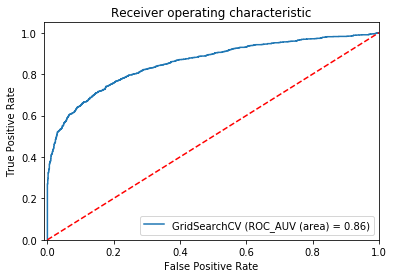

In [39]:
if 'LR' in model_2_run:
    best_clf_LR = run_model('LR')
    estimator_list.append(('LR', best_clf_LR))

# RUN SVM

In [40]:
if 'SVM' in model_2_run:
    best_clf_SVM = run_model('SVM')
    estimator_list.append(('SVM', best_clf_SVM))    

text pre-processing parameters:
    keep stop words
    do lemmatization
    tf-idf vectorization with 1 to 1 n-grams
Model accuracy is 0.7943610174685872

best pre_processing is : { keep , lem , (1, 1) , tf_idf }
best model is  LinearSVC(C=0.05878016072274912, class_weight=None, dual=True,
          fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
          max_iter=1000, multi_class='ovr', penalty='l2', random_state=None,
          tol=0.0001, verbose=0)
best accuracy is  0.7943610174685872


# RUN SGD

In [41]:
if 'SGD' in model_2_run:
    best_clf_SGD = run_model('SGD')
    estimator_list.append(('SGD', best_clf_SGD))        

text pre-processing parameters:
    keep stop words
    do lemmatization
    tf-idf vectorization with 1 to 1 n-grams
Model accuracy is 0.8011032791909286

best pre_processing is : { keep , lem , (1, 1) , tf_idf }
best model is  SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
best accuracy is  0.8011032791909286


# RUN PERCEPTRON

In [42]:
if 'PER' in model_2_run:
    best_clf_PER = run_model('PER')
    estimator_list.append(('PER', best_clf_PER))            

text pre-processing parameters:
    keep stop words
    do lemmatization
    tf-idf vectorization with 1 to 1 n-grams
Model accuracy is 0.7155991418939626

best pre_processing is : { keep , lem , (1, 1) , tf_idf }
best model is  Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty='l2', random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)
best accuracy is  0.7155991418939626


# RUN MULTI LAYER PERCEPTRON

text pre-processing parameters:
    keep stop words
    do lemmatization
    tf-idf vectorization with 1 to 1 n-grams
Model accuracy is 0.7640208397180509

best pre_processing is : { keep , lem , (1, 1) , tf_idf }
best model is  MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
best accuracy is  0.7640208397180509


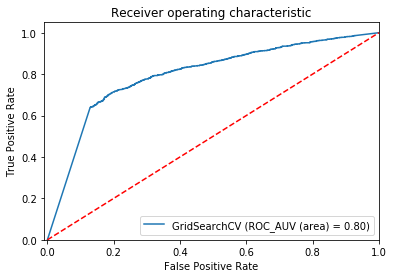

In [43]:
if 'MLP' in model_2_run:
    best_clf_MLP = run_model('MLP')
    estimator_list.append(('MLP', best_clf_MLP))                

# RUN PASSIVE AGGRESSIVE CLASSIFIER

In [44]:
if 'PAC' in model_2_run:
    best_clf_PAC = run_model('PAC')
    estimator_list.append(('PAC', best_clf_PAC))                    

text pre-processing parameters:
    keep stop words
    do lemmatization
    tf-idf vectorization with 1 to 1 n-grams
Model accuracy is 0.7575850444376341

best pre_processing is : { keep , lem , (1, 1) , tf_idf }
best model is  PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)
best accuracy is  0.7575850444376341


# RUN RANDOM FOREST

In [45]:
if 'RF' in model_2_run:
    best_clf_RF = run_model('RF')
    estimator_list.append(('RF', best_clf_RF))                        

# RUN DECISION TREE

text pre-processing parameters:
    keep stop words
    do lemmatization
    tf-idf vectorization with 1 to 1 n-grams
Model accuracy is 0.7015016855654306

best pre_processing is : { keep , lem , (1, 1) , tf_idf }
best model is  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=21, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
best accuracy is  0.7015016855654306


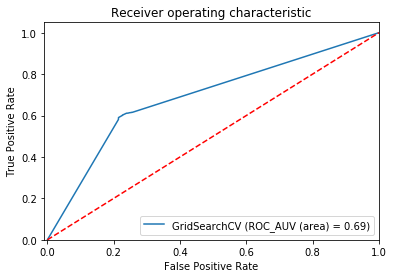

In [46]:
if 'DT' in model_2_run:
    best_clf_DT = run_model('DT')
    estimator_list.append(('DT', best_clf_DT))                            

# RUN ADABOOST

text pre-processing parameters:
    keep stop words
    do lemmatization
    tf-idf vectorization with 1 to 1 n-grams
Model accuracy is 0.7309224639901931

best pre_processing is : { keep , lem , (1, 1) , tf_idf }
best model is  AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
best accuracy is  0.7309224639901931


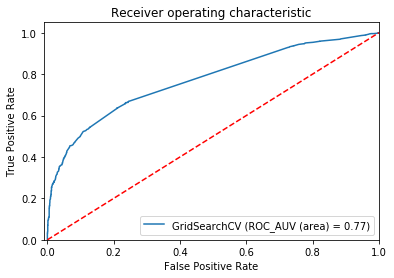

In [47]:
if 'ABC' in model_2_run:
    best_clf_ABC = run_model('ABC')
    estimator_list.append(('ABC', best_clf_ABC))                                

# RUN GRADIENT BOOSTING

text pre-processing parameters:
    keep stop words
    do lemmatization
    tf-idf vectorization with 1 to 1 n-grams
Model accuracy is 0.7367453263867606

best pre_processing is : { keep , lem , (1, 1) , tf_idf }
best model is  GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
best accuracy is  0.7367453263867606


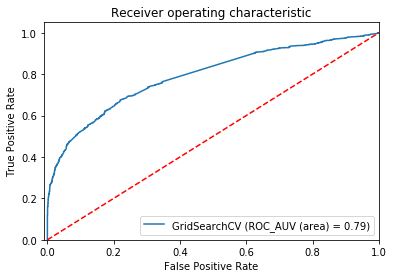

In [48]:
if 'GBC' in model_2_run:
    best_clf_GBC = run_model('GBC')
    estimator_list.append(('GBC', best_clf_GBC))                                    

# RUN GAUSSIAN NAIVE BAYES

text pre-processing parameters:
    keep stop words
    do lemmatization
    tf-idf vectorization with 1 to 1 n-grams
Model accuracy is 0.8020226785167024

best pre_processing is : { keep , lem , (1, 1) , tf_idf }
best model is  BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
best accuracy is  0.8020226785167024


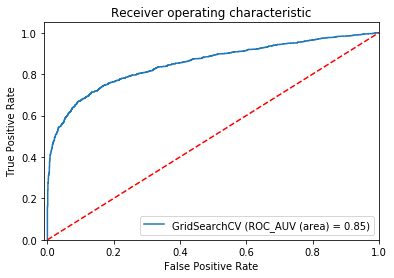

In [49]:
if 'NB' in model_2_run:
    best_clf_NB = run_model('NB')
    estimator_list.append(('NB', best_clf_NB))                                        

# HARD MAJORITY VOTE

In [50]:
prep_list = prep_algo_dic['LR']
for idx,prep in enumerate(prep_list):
    X,X_test = text_pre_processing(tweets_train_clean, tweets_test_clean, prep, verbose=1)


text pre-processing parameters:
    keep stop words
    do lemmatization
    tf-idf vectorization with 1 to 1 n-grams


In [51]:
hclf = VotingClassifier(
...     estimators=estimator_list,
...     voting='hard')
hclf_fitted         = hclf.fit(X_test, target_test)

In [52]:
for estimator in estimator_list:
    model,clf = estimator
    print(model,"Accuracy = ", clf.score(X_test, target_test))
print("HMJ Accuracy = ", hclf_fitted.score(X_test, target_test))

LR Accuracy =  0.7931351517008888
SVM Accuracy =  0.7943610174685872
SGD Accuracy =  0.8011032791909286
PER Accuracy =  0.7155991418939626
MLP Accuracy =  0.7640208397180509
PAC Accuracy =  0.7575850444376341
DT Accuracy =  0.7015016855654306
ABC Accuracy =  0.7309224639901931
GBC Accuracy =  0.7367453263867606
NB Accuracy =  0.8020226785167024
HMJ Accuracy =  0.907447134538768


# SOFT MAJORITY VOTE

In [53]:
sclf = VotingClassifier(
...     estimators=estimator_list,
...     voting='soft')
sclf_fitted         = sclf.fit(X_test, target_test)

In [54]:
for estimator in estimator_list:
    model,clf = estimator
    print(model,"Accuracy = ", clf.score(X_test, target_test))
print("SMJ Accuracy = ", sclf_fitted.score(X_test, target_test))

LR Accuracy =  0.7931351517008888
SVM Accuracy =  0.7943610174685872
SGD Accuracy =  0.8011032791909286
PER Accuracy =  0.7155991418939626
MLP Accuracy =  0.7640208397180509
PAC Accuracy =  0.7575850444376341
DT Accuracy =  0.7015016855654306
ABC Accuracy =  0.7309224639901931
GBC Accuracy =  0.7367453263867606
NB Accuracy =  0.8020226785167024


AttributeError: 'LinearSVC' object has no attribute 'predict_proba'

# GET PROCESSING TIME

In [ ]:
toc()